In [ ]:

import numpy as np
import pandas as pd
from scipy.stats import mode 
from typing import Tuple

from sklearn.metrics import confusion_matrix
import seaborn as sns

csv_path = "diabetes.csv"

Load csv

In [ ]:
def load_csv(csv_path:str):
    df = pd.read_csv(csv_path)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    x,y = df.iloc[:,:-1], df.iloc[:,-1]
    return x,y

In [ ]:
x,y = load_csv(csv_path)
x,y

In [ ]:
np.mean(x, axis=0), np.var(x, axis=0)

In [ ]:
np.nanmean(x, axis=0), np.nanvar(x, axis=0)

In [89]:
x.shape

(768, 8)

In [90]:
(x < 0.0).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Train test split

In [45]:
def train_test_split(features:pd.DataFrame, labels:pd.DataFrame, test_split_ratio:float):
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"

    x_train, y_train = features.iloc[:train_size, :], labels.iloc[:train_size]
    x_test, y_test = features.iloc[train_size:, :], labels.iloc[train_size:]
    return (x_train.reset_index(drop=True),y_train.reset_index(drop=True),x_test.reset_index(drop=True),y_test.reset_index(drop=True))

In [46]:
x_train, y_train, x_test, y_test = train_test_split(x, y, 0.2)

In [85]:
def euclidean(points:pd.DataFrame, element_of_x:pd.Series) -> pd.Series:
    return ((points - element_of_x)**2).sum(axis=1)**(1/2)

In [86]:
euclidean(x_train, x_test.iloc[0])

0      195.794581
1       52.922332
2       42.098231
3       33.526730
4       62.845547
          ...    
610     67.537045
611     38.977620
612     43.646649
613     57.508695
614     93.675214
Length: 615, dtype: float64

In [57]:
def predict(x_train:pd.DataFrame, y_train:pd.DataFrame, x_test:pd.DataFrame, k:int) -> pd.DataFrame:
    labels_pred = []
    for x_test_element in x_test:
        #távolságok meghatározása
        distances = euclidean(x_train, x_test_element)
        distances = pd.DataFrame({'distances': distances, 'labels': y_train})
        distances.sort_values(by='distances', inplace=True)

        #leggyakoribb labelt kiszedjük
        label_pred = mode(distances.iloc[:k,1], axis=0).mode[0]

        labels_pred.append(label_pred)
    return pd.Series(labels_pred, dtype=np.int64)


In [ ]:
y_preds = predict(x_train, y_train, y_test, 2)

In [59]:
def accuracy(y_test:pd.Series, y_preds:pd.Series) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

In [60]:
accuracy(y_test, y_preds)

62.091503267973856

In [61]:
def plot_confusion_matrix(y_test:pd.DataFrame, y_preds:pd.DataFrame) -> None:
    conf_matrix = confusion_matrix(y_test, y_preds)
    sns.heatmap(conf_matrix, annot=True)
    return confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

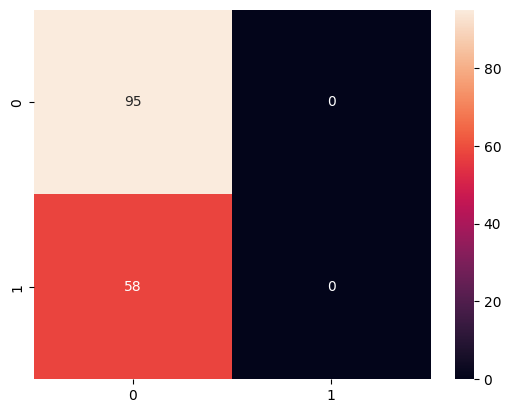

In [62]:
plot_confusion_matrix(y_test, y_preds)

In [87]:
def best_k() -> Tuple[int, float]:
        accuracy = 0
        idx = -1
        for i in range(1, 21):
            k = i
            predict(x_train, y_train, x_test, k)
            new_accuracy = accuracy()
            if new_accuracy > accuracy:
                accuracy = new_accuracy
                idx = i
        return (idx, round(accuracy, 2)) 

In [88]:
a,b = best_k()

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('int64'), dtype('<U11')) -> None